# Clustering Methods

In [13]:
# Load the Iris dataset
import pandas as pd
url = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/"
names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"]
df = pd.read_csv(url + "iris.data", header=None, names=names)

## 1.1 Clustering Data with k-Means

- Plot a scatter plot matrix between all features. Use the “Name” column to color the points. Note that you may have to convert the “Name” column into integers to use it for specifying the plot colors (see the ‘c’ parameter). Resize the plot as needed. Do the three classes appear to be equally well-separated or is one more different than the others?

In [14]:
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
from pandas.plotting import scatter_matrix

# Convert Name class into integers with factorize instead of creating a dictionary (more scalable).
# Add 1 to have names begin with 1 instead of 0
df['Name'] = pd.factorize(df['Name'])[0]+1
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


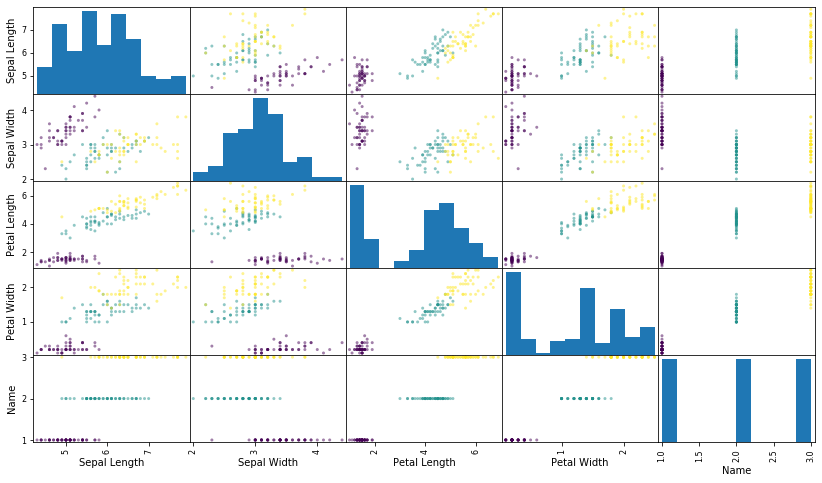

In [74]:
scatter_matrix(df, alpha=0.5, figsize=(14, 8), c=df['Name']);

**Answer**: Based on the scatter plot matrix above, Iris-setosa (Name 1) appears to be more different than Iris-versicolor and Iris-viginica because its feature plots are often much further away from the other two while the other two often have overlap in the feature plots.

- Cluster the the data using k-Means clustering. Form 3 clusters (n_clusters=3), with the four features as the input data, and plot the resulting clusters as a 2D scatter plot. Use “Petal Length” for the x -axis of the plot and “Petal Width” for the y-axis, with each point colored according to its assigned cluster label.

In [75]:
# Drop the Name class
df_features = df.drop('Name', axis=1)
df_features

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

n_classes = df['Name'].nunique()
n_classes
model = KMeans(n_clusters=n_classes).fit(df_features)
model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [77]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

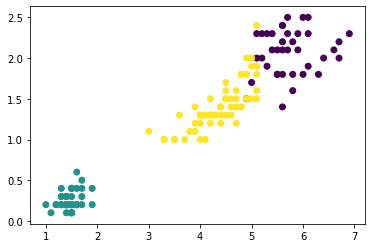

In [81]:
# scatter_plot = plt.scatter(x=df_features['Petal Length'], y=df_features['Petal Width'], c=model.labels_, cmap='rainbow')

# Use kmeans labels to determine color, use data attribute to simplify assigning features
scatter_plot = plt.scatter(data=df_features, x='Petal Length', y='Petal Width', c=model.labels_.astype(float))

- Show the cross-tabulation of the actual class values and the cluster labels. How many instances belong to an incorrect cluster? Do any of the cluster labels correspond perfectly to a class label? Do these observations agree with what you observed from the scatter plot matrix?

In [79]:
from pandas import crosstab

pd.crosstab(df['Name'], model.labels_)

col_0,0,1,2
Name,,,
1,0,50,0
2,2,0,48
3,36,0,14


**Answer**: Two Name 2 (Iris-versicolor) instances are in cluster 0 instead of cluster 2, and 14 Name 3 (Iris-virginica) instances are in cluster 2 instead of cluster 0. So 16 instances seem to belong to an incorrect cluster. All 50 Name 1 (Iris-setosa) clusters correspond perfectly to its class label (all in cluster 1), which agrees with the observation from the scatter plot matrix: it's more different than the other classes. Since the other two classes overlapped in the scatter plot matrix, it is reasonable that they would be incorrectly clustered sometimes.

## 1.2 Hierarchical Clustering of Features

- To assess how similar the features are, calculate the mutual information between all pairs of features; that is, use each feature as the target variable once in the calculation. Create a DataFrame from the output and label the indices and columns of the DataFrame with the appropriate feature names.

- Create a dendrogram from the mutual information DataFrame. According to the dendrogram, which pair of features is most similar? Which feature is most unlike the others? You may use the following function to generate the dendrogram, which takes as input the fit cluster model; you can pass the feature names with the labels parameter.